In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("cluster_4y.csv")

In [3]:
data.head()

,Unnamed: 0,BBL,EUI_16,Score_16,EUI_15,Score_15,EUI_14,Score_14,EUI_13,Score_13
0,0,1.014270e+09,44.5,80.0,195.7,Not Available,172.7,Not Available,180.3,NaN
1,1,1.015180e+09,90.8,10.0,159.7,Not Available,103.4,Not Available,94.8,NaN
2,2,1.000048e+09,133.8,71.0,358.8,61,229.5,92,287.9,75
3,3,1.000058e+09,132.5,71.0,223.5,77,238,73,261.5,70
4,4,1.000088e+09,139.2,1.0,165,1,205.3,Not Available,163.2,NaN


In [4]:
data_day = data[['EUI_16', 'EUI_15', 'EUI_14', 'EUI_13', 'BBL' ]]

In [5]:
data_normal = data[['EUI_16', 'EUI_15', 'EUI_14', 'EUI_13' ]]

In [6]:
data_normal.replace('Not Available', np.nan, inplace=True)
data_normal.replace('See Primary BBL', np.nan, inplace=True)
data_normal.dropna(inplace = True)
data_normal = data_normal.convert_objects(convert_numeric=True)
data_normal = data_normal[~(data_day == 0).any(axis=1)]

/Users/chenhongting/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/chenhongting/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/chenhongting/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/chenhon

In [7]:
data_day.replace('Not Available', np.nan, inplace=True)
data_day.replace('See Primary BBL', np.nan, inplace=True)

/Users/chenhongting/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/chenhongting/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [8]:
data_day.dropna(inplace = True)

/Users/chenhongting/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [9]:
data_day = data_day.convert_objects(convert_numeric=True)
#data_day = data_day[(data_day != 0)]

/Users/chenhongting/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':


In [10]:
data_day.shape

(5487, 5)

In [11]:
data_day[data_day==0].count()

EUI_16     5
EUI_15     2
EUI_14     2
EUI_13    17
BBL        0
dtype: int64

In [12]:
data_day = data_day[~(data_day == 0).any(axis=1)]

In [13]:
data_day.shape

(5466, 5)

In [14]:
data_day['EUI_16'] = np.log(data_day['EUI_16'].astype('float64'))

In [15]:
data_day['EUI_15']= np.log(data_day['EUI_15'].astype('float64'))

In [16]:
data_day['EUI_14'] = np.log(data_day['EUI_14'].astype('float64'))
data_day['EUI_13'] = np.log(data_day['EUI_13'].astype('float64'))

In [17]:
data_day.dropna(inplace = True)

In [18]:
data_day.shape

(5466, 5)

In [19]:
std_16 = data_day['EUI_16'].std()
std_15 = data_day['EUI_15'].std()
std_14 = data_day['EUI_14'].std()
std_13 = data_day['EUI_13'].std()

In [20]:
data_day['EUI_15'].std()

0.6537455160715985

In [21]:
data_=data_day[(data_day['EUI_16']>data_day['EUI_16'].mean()- 2*std_16)&(data_day['EUI_16']<data_day['EUI_16'].mean()+2*std_16)]

In [22]:
data_.shape

(5276, 5)

In [23]:
data_=data_[(data_['EUI_15']>data_day['EUI_15'].mean()- 2*std_15)&(data_['EUI_15']<data_day['EUI_15'].mean()+2*std_15)]

In [24]:
data_=data_[(data_['EUI_14']>data_day['EUI_14'].mean()- 2*std_14)&(data_['EUI_14']<data_day['EUI_14'].mean()+2*std_14)]

In [25]:
data_=data_[(data_['EUI_13']>data_day['EUI_13'].mean()- 2*std_13)&(data_['EUI_13']<data_day['EUI_13'].mean()+2*std_13)]

In [26]:
data_.head()

,EUI_16,EUI_15,EUI_14,EUI_13,BBL
0,3.795489,5.276583,5.151556,5.194622,1.014270e+09
1,4.508659,5.073297,4.638605,4.551769,1.015180e+09
2,4.896346,5.882765,5.435903,5.662613,1.000048e+09
3,4.886583,5.409411,5.472271,5.566434,1.000058e+09
4,4.935912,5.105945,5.324472,5.094976,1.000088e+09


In [27]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
from sklearn.cluster import KMeans

In [28]:
X=data_[['EUI_16', 'EUI_15', 'EUI_14', 'EUI_13' ]]
range_n_clusters = [2, 3, 4, 5]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.3815893987349585
For n_clusters =3, the average silhouette_score is :0.3223237219275407
For n_clusters =4, the average silhouette_score is :0.27448050868574647
For n_clusters =5, the average silhouette_score is :0.2540113935839685


In [29]:
n=2 # number of clusters
dd=data_[['EUI_16', 'EUI_15', 'EUI_14', 'EUI_13' ]] #data
#tar=y# real target

#train the model.
km=KMeans(random_state=324,n_clusters=n)
res=km.fit(dd)
#result.
print(res.labels_)
# print res.predict(dd)

[0 1 0 ..., 1 0 1]


In [30]:
rest = []
rest = res.labels_

In [31]:
data_['label'] = rest

In [32]:
data_.head()

,EUI_16,EUI_15,EUI_14,EUI_13,BBL,label
0,3.795489,5.276583,5.151556,5.194622,1.014270e+09,0
1,4.508659,5.073297,4.638605,4.551769,1.015180e+09,1
2,4.896346,5.882765,5.435903,5.662613,1.000048e+09,0
3,4.886583,5.409411,5.472271,5.566434,1.000058e+09,0
4,4.935912,5.105945,5.324472,5.094976,1.000088e+09,0


In [33]:
data_exp = pd.DataFrame()
data_exp['EUI_16'] = np.exp(data_['EUI_16'])

In [34]:
data_exp['EUI_15'] = np.exp(data_['EUI_15'])
data_exp['EUI_14'] = np.exp(data_['EUI_14'])
data_exp['EUI_13'] = np.exp(data_['EUI_13'])


In [35]:
data_.to_csv('time_eui_log.csv')

In [36]:
data_exp.to_csv('time_eui_normal.csv')

In [37]:
data_.groupby(by="label").mean()

,EUI_16,EUI_15,EUI_14,EUI_13,BBL
label,,,,,
0,4.629126,5.211202,5.219283,5.232011,1.803316e+09
1,4.269865,4.684157,4.682549,4.665014,2.251502e+09


In [38]:
# for regular one , not log
X=data_exp
range_n_clusters = [2, 3, 4, 5]
for n_clusters in range_n_clusters:
    km = KMeans(n_clusters=n_clusters, random_state=324)
    cluster_labels = km.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters ={},".format(n_clusters)+" the average silhouette_score is :{}".format(silhouette_avg))

For n_clusters =2, the average silhouette_score is :0.5838685271655162
For n_clusters =3, the average silhouette_score is :0.4082474009646534
For n_clusters =4, the average silhouette_score is :0.3621702043872908
For n_clusters =5, the average silhouette_score is :0.30808508960694075


In [39]:
n=2 # number of clusters
dd=data_exp #data
#tar=y# real target

#train the model.
km=KMeans(random_state=324,n_clusters=n)
res=km.fit(dd)
#result.
print(res.labels_)

[1 1 0 ..., 1 0 1]


In [40]:
exp_res = []
exp_res = res.labels_ 

In [41]:
data_exp['label'] = exp_res

In [42]:
d = data_exp.groupby(by="label").mean()

In [43]:
 f = data_exp.groupby(by="label").std()

In [44]:
data_exp.groupby(by="label").mean()

,EUI_16,EUI_15,EUI_14,EUI_13
label,,,,
0,117.601001,235.153949,238.953170,246.461624
1,80.774541,122.755190,123.039155,122.304868


In [369]:
data.hist?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12a33d278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x12aa08cc0>]], dtype=object)

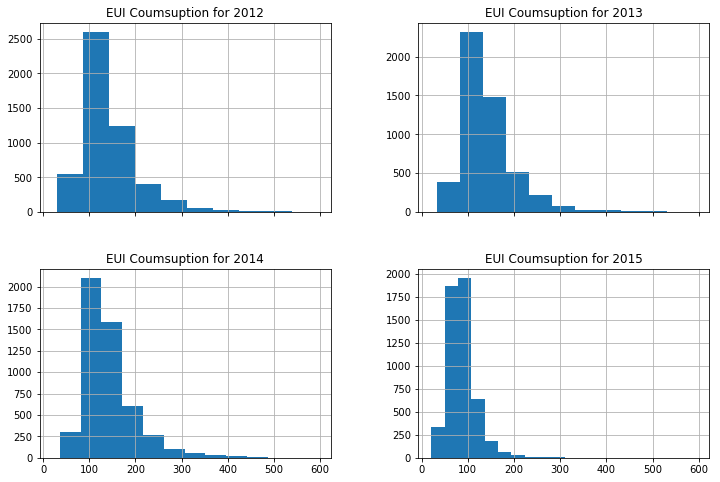

In [371]:
#plt.title("Building Energy Comsumption for 2013-2016")
data = data_exp[['EUI_13','EUI_14','EUI_15','EUI_16']]
data.columns = ['EUI Coumsuption for 2012','EUI Coumsuption for 2013',\
               'EUI Coumsuption for 2014','EUI Coumsuption for 2015']
data.hist(figsize = (12,8),sharex=True)
#plt.title('Building')


In [45]:
s_u = d+f

In [46]:
s_d = d-f

In [47]:
s = pd.DataFrame()

In [48]:
s['std_up_16'] = d['EUI_16']+ f ['EUI_16']
s['std_up_15'] = d['EUI_15']+ f ['EUI_15']
s['std_up_14'] = d['EUI_14']+ f ['EUI_14']
s['std_up_13'] = d['EUI_13']+ f ['EUI_13']

In [49]:
s['std_down_16'] = d['EUI_16']- f ['EUI_16']
s['std_down_15'] = d['EUI_15']- f ['EUI_15']
s['std_down_14'] = d['EUI_14']- f ['EUI_14']
s['std_down_13'] = d['EUI_13']- f ['EUI_13']

In [379]:
mean = d[['EUI_13','EUI_14','EUI_15','EUI_16']]
mean.columns = ['2012','2013',\
               '2014','2015']

In [374]:
std_up = s_u[['EUI_13','EUI_14','EUI_15','EUI_16']]
std_up.columns = ['2012','2013','2014','2015']
std_upt = std_up.T

In [214]:
std_upt

label,0,1
2013,324.720446,156.024221
2014,307.958770,154.870702
2015,300.200409,153.547870
2016,158.902604,104.246465


In [209]:
s_d

,EUI_16,EUI_15,EUI_14,EUI_13
label,,,,
0,76.299399,170.107488,169.947571,168.202802
1,57.302617,91.962509,91.207608,88.585515


In [373]:
std_down = s_d[['EUI_13','EUI_14','EUI_15','EUI_16']]
std_down.columns = ['2012','2013','2014','2015']
std_downt = std_down.T

In [216]:
std_downt

label,0,1
2013,168.202802,88.585515
2014,169.947571,91.207608
2015,170.107488,91.962509
2016,76.299399,57.302617


In [380]:
meant = mean.T
meant

label,0,1
2012,246.461624,122.304868
2013,238.953170,123.039155
2014,235.153949,122.755190
2015,117.601001,80.774541


In [224]:
std_upt

label,0,1
2013,324.720446,156.024221
2014,307.958770,154.870702
2015,300.200409,153.547870
2016,158.902604,104.246465


In [190]:
std_upt[0] = pd.to_numeric(std_upt[0])
std_upt[1] = pd.to_numeric(std_upt[1])

In [377]:
x = [2012, 2013, 2014, 2015]

In [238]:
meant

label,0,1
2013,246.461624,122.304868
2014,238.953170,123.039155
2015,235.153949,122.755190
2016,117.601001,80.774541


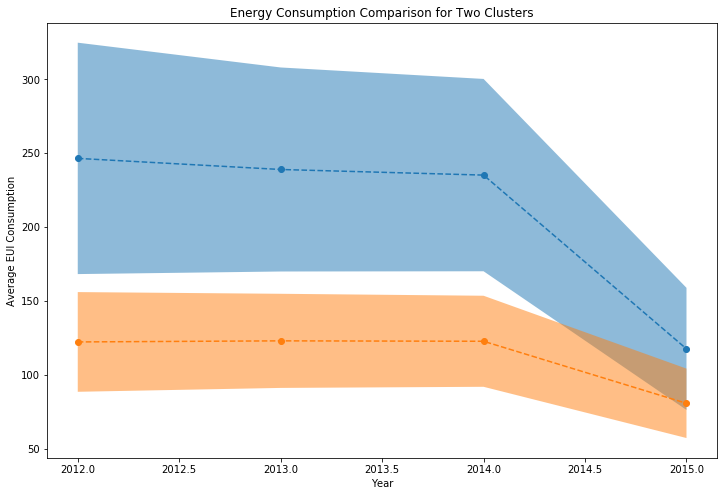

In [386]:
#data.T.plot()
fig = plt.figure(figsize = (12,8))
plt.plot(meant, marker='o', linestyle='--')

plt.fill_between(x,std_upt[0],std_downt[0], alpha = 0.5)
plt.fill_between(x,std_upt[1],std_downt[1], alpha = 0.5)


plt.ylabel('Average EUI Consumption')
plt.xlabel('Year')
plt.title('Energy Consumption Comparison for Two Clusters')


In [51]:
X.mean().T

EUI_16     87.278861
EUI_15    142.607151
EUI_14    143.511984
EUI_13    144.233536
label       0.823379
dtype: float64

In [52]:
Mean_real = X[['EUI_16','EUI_15', 'EUI_14', 'EUI_13']]

In [53]:
import matplotlib.pyplot as plt
%matplotlib inline

In [54]:
s_u

,EUI_16,EUI_15,EUI_14,EUI_13
label,,,,
0,158.902604,300.200409,307.958770,324.720446
1,104.246465,153.547870,154.870702,156.024221


In [81]:
Mean_real.head()

,EUI_16,EUI_15,EUI_14,EUI_13
0,44.5,195.7,172.7,180.3
1,90.8,159.7,103.4,94.8
2,133.8,358.8,229.5,287.9
3,132.5,223.5,238.0,261.5
4,139.2,165.0,205.3,163.2


In [204]:
s_u

,EUI_16,EUI_15,EUI_14,EUI_13
label,,,,
0,158.902604,300.200409,307.958770,324.720446
1,104.246465,153.547870,154.870702,156.024221


In [205]:
s_d

,EUI_16,EUI_15,EUI_14,EUI_13
label,,,,
0,76.299399,170.107488,169.947571,168.202802
1,57.302617,91.962509,91.207608,88.585515


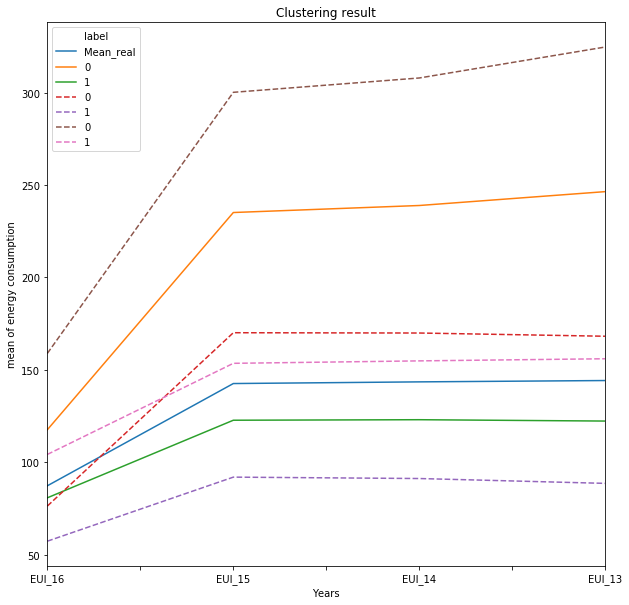

In [80]:

#f.T.plot()
f, ax = plt.subplots(figsize = (10,10))
Mean_real.mean().T.plot(ax = ax,  label='Mean_real', legend = True)
d.T.plot(ax = ax, legend = True, label = 'Mean')
s_d.T.plot(ax = ax, style='--', label='STD', legend = True)
s_u.T.plot(ax = ax, style = '--', label = 'std',legend = True)
ax.set_title('Clustering result')
ax.set_xlabel('Years')
ax.set_ylabel('mean of energy consumption')
#plt.plot(f.T,'r')


In [329]:
data_16 = pd.read_csv("final_data.csv")

In [330]:
data_16.head(1)

,Unnamed: 0,BuiltFAR,YearBuilt,DOF Property Floor Area (ft²),LotType,ProxCode,BBL,Primary Property Type - Self Selected,Zip Code,LotArea,NumFloors,Weather Normalized Site EUI (kBtu/ft²),Oil,Diesel,Water,Gas,Electricity
0,0,18.67,1985,169061.0,0.0,1.0,1.000088e+09,Residential,10004.0,9053,19.0,139.2,1.0,0.0,0.0,0.0,0.0


In [331]:
data_16.rename(columns = {'Weather Normalized Site EUI (kBtu/ft²)':'EUI_16'}, inplace = True)

In [332]:
data_16.columns

Index(['Unnamed: 0', 'BuiltFAR', 'YearBuilt', 'DOF Property Floor Area (ft²)',
       'LotType', 'ProxCode', 'BBL', 'Primary Property Type - Self Selected',
       'Zip Code', 'LotArea', 'NumFloors', 'EUI_16', 'Oil', 'Diesel', 'Water',
       'Gas', 'Electricity'],
      dtype='object')

In [335]:
merged.shape

(3465, 22)

In [339]:
merged = data_16.merge(data_,on='BBL', how = 'inner')

In [294]:
merged[merged.label==0].groupby(by='Primary Property Type - Self Selected').count()

,Unnamed: 0,BuiltFAR,YearBuilt,DOF Property Floor Area (ft²),LotType,ProxCode,BBL,Zip Code,LotArea,NumFloors,...,Oil,Diesel,Water,Gas,Electricity,EUI_16_y,EUI_15,EUI_14,EUI_13,label
Primary Property Type - Self Selected,,,,,,,,,,,,,,,,,,,,,
Commercial,194,194,194,194,194,194,194,194,194,194,...,194,194,194,194,194,194,194,194,194,194
Residential,997,997,997,997,997,997,997,997,997,997,...,997,997,997,997,997,997,997,997,997,997


In [295]:
merged[merged.label==1].groupby(by='Primary Property Type - Self Selected').count()

,Unnamed: 0,BuiltFAR,YearBuilt,DOF Property Floor Area (ft²),LotType,ProxCode,BBL,Zip Code,LotArea,NumFloors,...,Oil,Diesel,Water,Gas,Electricity,EUI_16_y,EUI_15,EUI_14,EUI_13,label
Primary Property Type - Self Selected,,,,,,,,,,,,,,,,,,,,,
Commercial,61,61,61,61,61,61,61,61,61,61,...,61,61,61,61,61,61,61,61,61,61
Residential,2213,2213,2213,2213,2213,2213,2213,2213,2213,2213,...,2213,2213,2213,2213,2213,2213,2213,2213,2213,2213


In [62]:
merged.columns

Index(['Unnamed: 0', 'BuiltFAR', 'YearBuilt', 'DOF Property Floor Area (ft²)',
       'LotType', 'ProxCode', 'BBL', 'Primary Property Type - Self Selected',
       'Zip Code', 'LotArea', 'NumFloors', 'EUI_16_x', 'Oil', 'Diesel',
       'Water', 'Gas', 'Electricity', 'EUI_16_y', 'EUI_15', 'EUI_14', 'EUI_13',
       'label'],
      dtype='object')

In [63]:
merged.shape

(3465, 22)

In [64]:
year_built = data_16['YearBuilt'].mean()
floor_area = data_16['DOF Property Floor Area (ft²)'].mean()
lot_area = data_16['LotArea'].mean()
num_floor = data_16['NumFloors'].mean()

In [65]:
meant = pd.DataFrame()

In [66]:
meant['YearBuilt'] = data_16['YearBuilt'].mean()
meant['DOF Property Floor Area (ft²)'] = data_16['DOF Property Floor Area (ft²)'].mean()
meant['LotArea'] = data_16['LotArea'].mean()
meant['NumFloors'] = data_16['NumFloors'].mean()
meant['BuiltFAR'] = data_16['BuiltFAR'].mean()

In [67]:
meant['BuiltFAR']

Series([], Name: BuiltFAR, dtype: float64)

In [68]:
year_built_std = data_16['YearBuilt'].std()
floor_area_std = data_16['DOF Property Floor Area (ft²)'].std()
lot_area_std = data_16['LotArea'].std()
num_floor_std = data_16['NumFloors'].std()

In [69]:
merge_data = merged.groupby(by="label").mean()

In [310]:
merge_data

,Unnamed: 0,BuiltFAR,YearBuilt,DOF Property Floor Area (ft²),LotType,ProxCode,BBL,Zip Code,LotArea,NumFloors,EUI_16_x,Oil,Diesel,Water,Gas,Electricity,EUI_16_y,EUI_15,EUI_14,EUI_13
label,,,,,,,,,,,,,,,,,,,,
0,3077.654072,9.303636,1953.632242,203909.889169,3.564232,0.759026,1.965946e+09,10479.452561,43740.611251,13.496641,106.640134,0.138539,0.0,0.040302,0.579345,0.193955,4.631238,5.158520,5.164923,5.180913
1,2982.934037,5.553597,1947.578716,120994.605541,3.868953,0.694371,2.417381e+09,10709.934477,32717.630607,9.017590,76.646966,0.178980,0.0,0.014952,0.730871,0.057608,4.306416,4.682682,4.686598,4.669853


In [71]:
merge_data['BuiltFAR']

label
0    9.303636
1    5.553597
Name: BuiltFAR, dtype: float64

In [72]:
merge_data_n = merge_data[['BuiltFAR', 'YearBuilt','DOF Property Floor Area (ft²)','NumFloors', 'LotArea']]

In [240]:
merge_data_n.head()

,BuiltFAR,YearBuilt,DOF Property Floor Area (ft²),NumFloors,LotArea
label,,,,,
0,9.303636,1953.632242,203909.889169,13.496641,43740.611251
1,5.553597,1947.578716,120994.605541,9.017590,32717.630607


In [241]:
data_16.head(1)

,Unnamed: 0,BuiltFAR,YearBuilt,DOF Property Floor Area (ft²),LotType,ProxCode,BBL,Primary Property Type - Self Selected,Zip Code,LotArea,NumFloors,EUI_16,Oil,Diesel,Water,Gas,Electricity
0,0,18.67,1985,169061.0,0.0,1.0,1.000088e+09,Residential,10004.0,9053,19.0,139.2,1.0,0.0,0.0,0.0,0.0


In [287]:
data_ori = data_16[['BuiltFAR','YearBuilt','DOF Property Floor Area (ft²)','NumFloors','LotArea']]

In [288]:
data_ori.shape

(6412, 5)

In [277]:
data_ori[data_ori['NumFloors'] <=0 ]

,BuiltFAR,YearBuilt,DOF Property Floor Area (ft²),NumFloors,LotArea
1641,5.07,2013,130228.0,0.0,25669
2374,4.79,2013,186779.0,0.0,38983
4050,5.21,2014,157074.0,0.0,30165


In [289]:
data_ori.drop(4496, axis = 0,inplace = True)
data_ori.drop(1641, axis = 0,inplace = True)
data_ori.drop(2374, axis = 0,inplace = True)
data_ori.drop(4050, axis = 0,inplace = True)

/Users/chenhongting/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/chenhongting/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/chenhongting/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
/Users/chenhon

In [283]:
data_ori_log = data_ori.applymap(lambda x: np.log(x))

In [340]:
merged = merged.drop(['Unnamed: 0'], axis = 1)

In [341]:
merged = merged[['BuiltFAR','YearBuilt','DOF Property Floor Area (ft²)','NumFloors','LotArea','label']]

In [338]:
#merged = merged.applymap(lambda x: np.log(x))

/Users/chenhongting/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


In [342]:
merged_0 = merged[merged['label'] == 0]
merged_1 = merged[merged['label'] == 1]

In [382]:
merged_0.shape

(1191, 6)

In [383]:
merged_1.shape

(2274, 6)

In [343]:
merged_0.head()

,BuiltFAR,YearBuilt,DOF Property Floor Area (ft²),NumFloors,LotArea,label
0,18.67,1985,169061.0,19.0,9053,0
1,4.31,1988,237270.0,9.0,45203,0
2,5.28,1990,189273.0,9.0,29850,0
3,16.61,2006,434680.0,35.0,20763,0
5,11.71,2008,425407.0,32.0,32218,0


In [344]:
merged_0_log = merged_0.applymap(lambda x: np.log(x))
merged_1_log = merged_1.applymap(lambda x: np.log(x))

/Users/chenhongting/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


In [349]:
#data_to_plot = [data_ori_log['BuiltFAR'],data_ori_log['YearBuilt'],\
 #               data_ori_log['DOF Property Floor Area (ft²)'],\
#              data_ori_log['NumFloors'],data_ori_log['LotArea']]

BuiltFAR_to_plot = [data_ori_log['BuiltFAR'],merged_0_log['BuiltFAR'],\
               merged_1_log['BuiltFAR']]
YearBuilt_to_plot = [data_ori_log['YearBuilt'],merged_0_log['YearBuilt'],\
               merged_1_log['YearBuilt']]
FloorArea_to_plot = [data_ori_log['DOF Property Floor Area (ft²)'],\
                     merged_0_log['DOF Property Floor Area (ft²)'],\
               merged_1_log['DOF Property Floor Area (ft²)']]
NumFloors_to_plot = [data_ori_log['NumFloors'],merged_0_log['NumFloors'],\
               merged_1_log['NumFloors']]
LotArea_to_plot = [data_ori_log['LotArea'],merged_0_log['LotArea'],\
               merged_1_log['LotArea']]

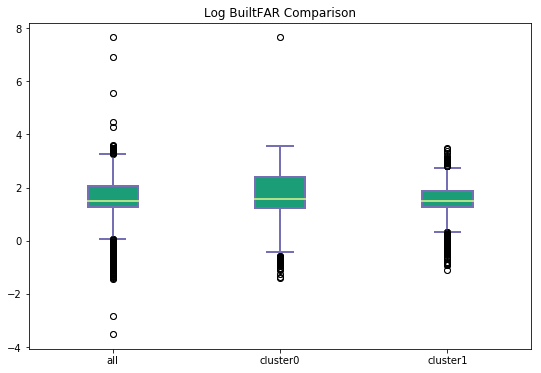

In [364]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(BuiltFAR_to_plot)

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')
bp = ax.boxplot(BuiltFAR_to_plot, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
    
ax.set_xticklabels(['all', 'cluster0', 'cluster1'])
ax.set_title('Log BuiltFAR Comparison')

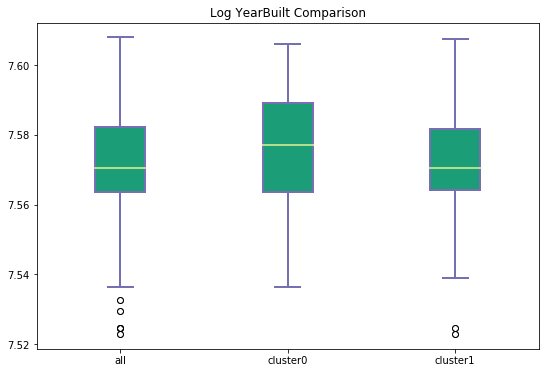

In [365]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(YearBuilt_to_plot)

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')
bp = ax.boxplot(YearBuilt_to_plot, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
    
ax.set_xticklabels(['all', 'cluster0', 'cluster1'])
ax.set_title('Log YearBuilt Comparison')

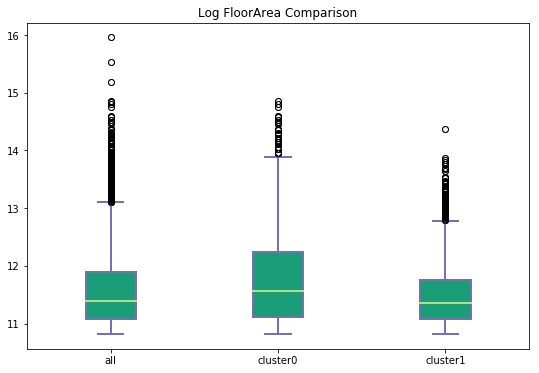

In [366]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(FloorArea_to_plot)

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')
bp = ax.boxplot(FloorArea_to_plot, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
    
ax.set_xticklabels(['all', 'cluster0', 'cluster1'])
ax.set_title('Log FloorArea Comparison')

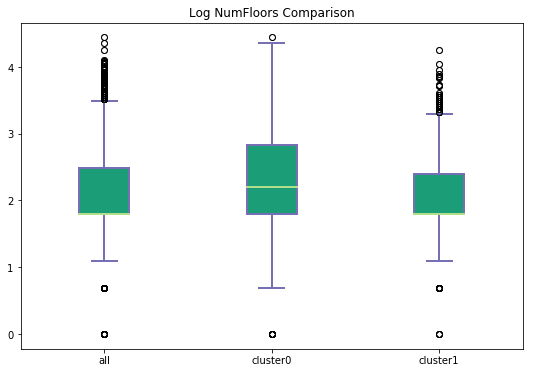

In [367]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(NumFloors_to_plot)

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')
bp = ax.boxplot(NumFloors_to_plot, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
    
ax.set_xticklabels(['all', 'cluster0', 'cluster1'])
ax.set_title('Log NumFloors Comparison')

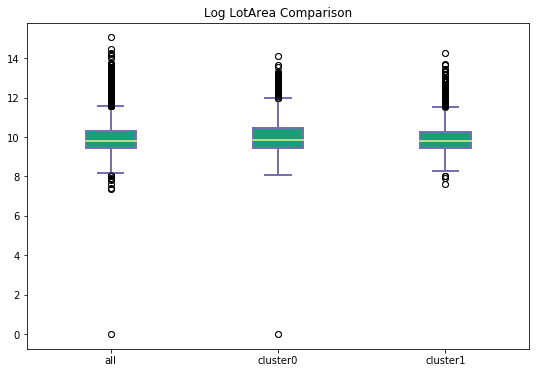

In [368]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(LotArea_to_plot)

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')
bp = ax.boxplot(LotArea_to_plot, patch_artist=True)

## change outline color, fill color and linewidth of the boxes
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e77' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
    
ax.set_xticklabels(['all', 'cluster0', 'cluster1'])
ax.set_title('Log LotArea Comparison')

In [290]:
data_ori_log.mean()

BuiltFAR                              6.796582
YearBuilt                          1948.051966
DOF Property Floor Area (ft²)    147911.946005
NumFloors                            10.220740
LotArea                           36892.806336
dtype: float64

In [292]:
data_ori_log.std()

BuiltFAR                         0.722481
YearBuilt                        0.014840
DOF Property Floor Area (ft²)    0.673293
NumFloors                        0.595188
LotArea                          0.853603
dtype: float64

In [293]:
data_ori_log.shape

(6408, 5)

In [255]:
len(data_ori[data_ori['BuiltFAR'] >= 7])

1792

In [74]:
merge_data_n['BuiltFAR']- data_16['BuiltFAR'].mean()

label
0    2.508943
1   -1.241096
Name: BuiltFAR, dtype: float64

In [75]:
data_16['BuiltFAR'].mean()

6.794692763568306

In [76]:
num_floor - num_floor_std

2.1830860522874787

In [77]:
num_floor_std

8.031277640788005

In [78]:
num_floor

10.214363693075484

In [79]:
merge_data['NumFloors']

label
0    13.496641
1     9.017590
Name: NumFloors, dtype: float64